In [132]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit‑learn for modeling & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve)
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Path to the dataset (update if needed)
csv_path = r"C:\Users\kyrda\OneDrive\Desktop\GITHUB Projects\IBM HR Analytics Employee Attrition & Performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Verify the file exists
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"CSV not found at: {csv_path}")

# Load into a DataFrame
df = pd.read_csv(csv_path)

# Quick look
print("Shape:", df.shape)
print(df.head())


Shape: (1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpt

In [133]:
df.describe(include='all').transpose()



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [134]:
df.isnull().sum().sort_values(ascending=False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

In [135]:
df.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


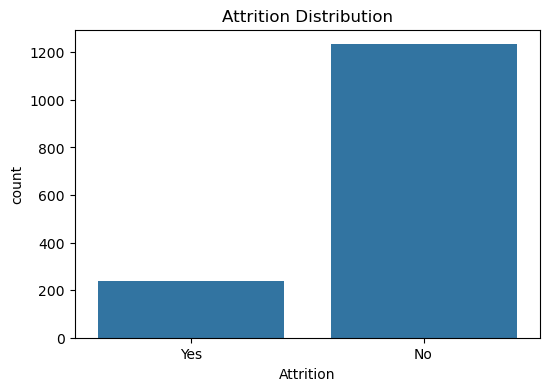

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


In [136]:
# Countplot of Attrition classes
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

# Proportions
print(df["Attrition"].value_counts(normalize=True))

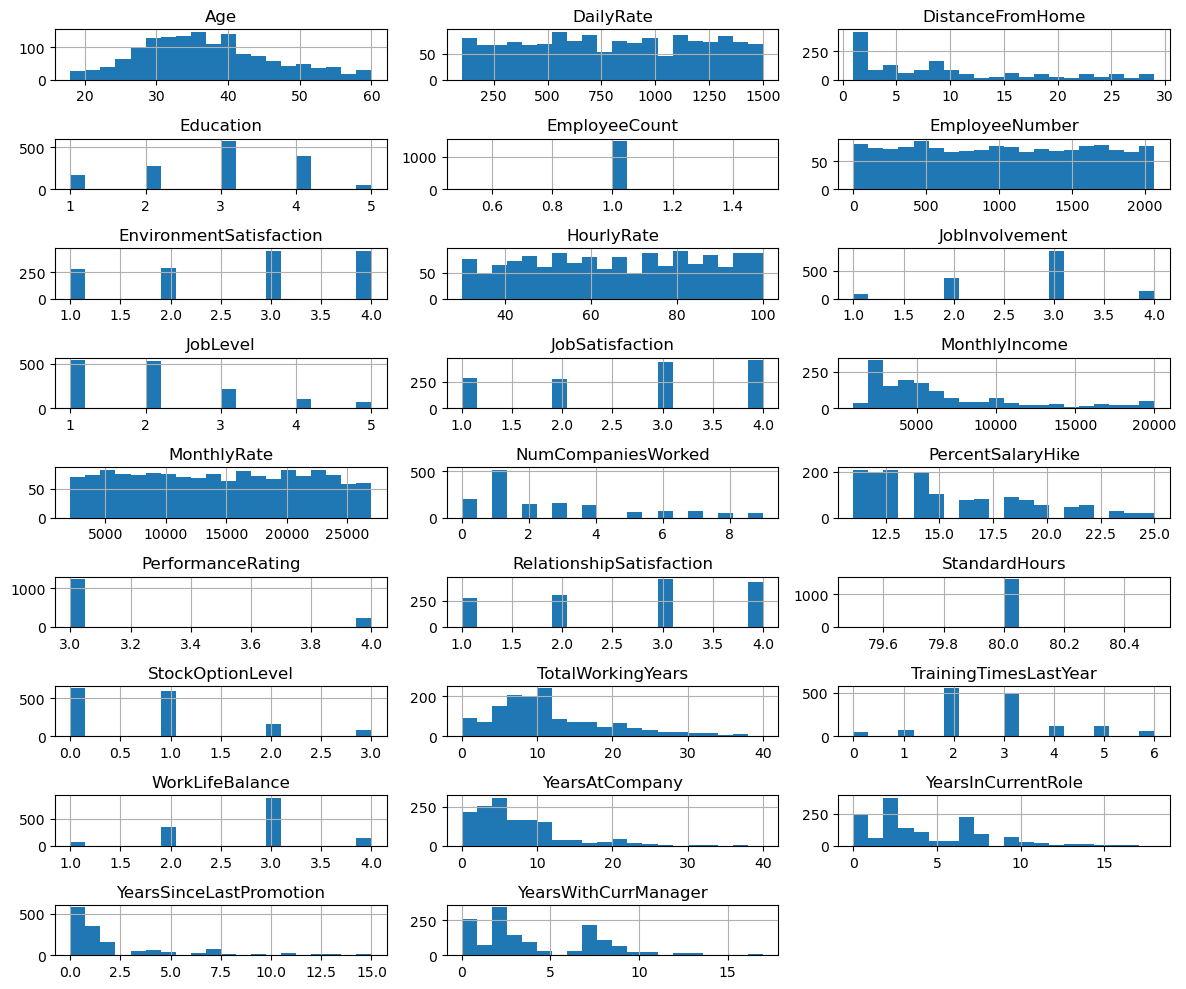

In [137]:
# Select numerical columns
num_cols = df.select_dtypes(include="number").columns.tolist()

# Plot histograms
df[num_cols].hist(bins=20, figsize=(12,10), layout=(int(len(num_cols)/3)+1, 3))
plt.tight_layout()
plt.show()

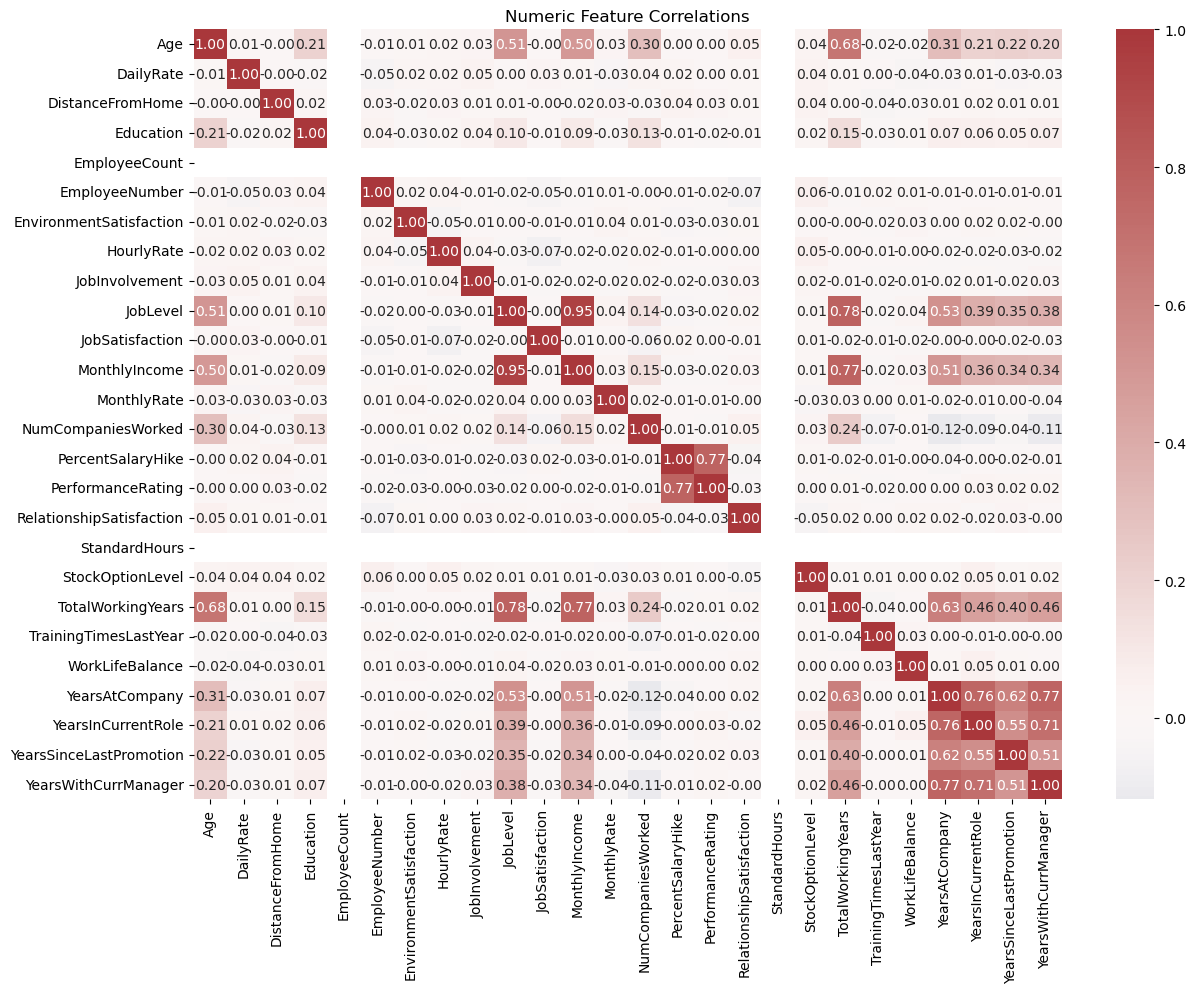

In [138]:
plt.figure(figsize=(14,10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Numeric Feature Correlations")
plt.show()

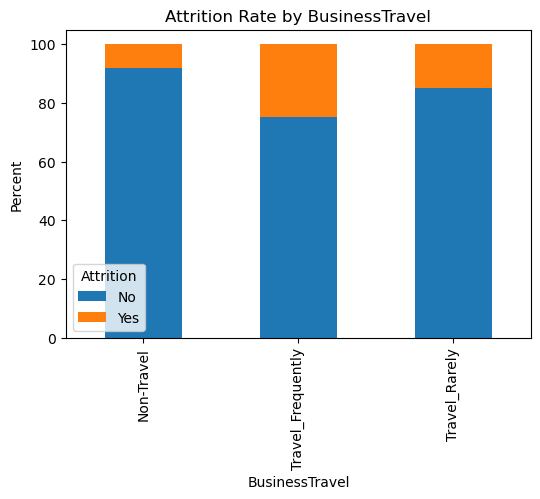

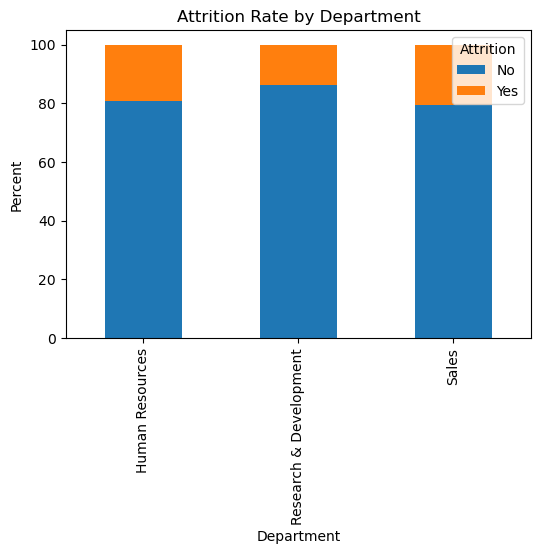

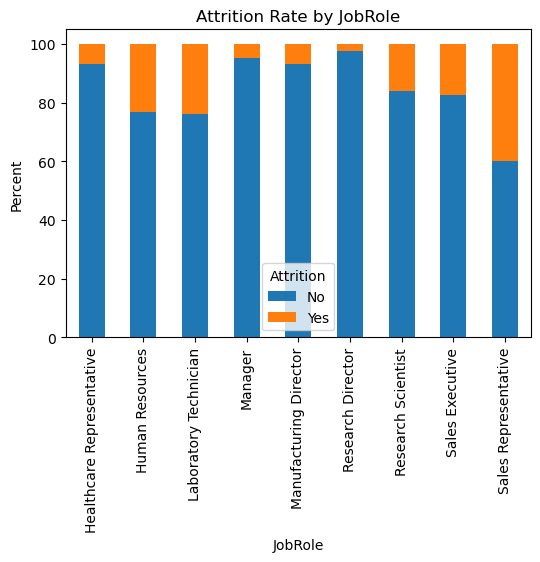

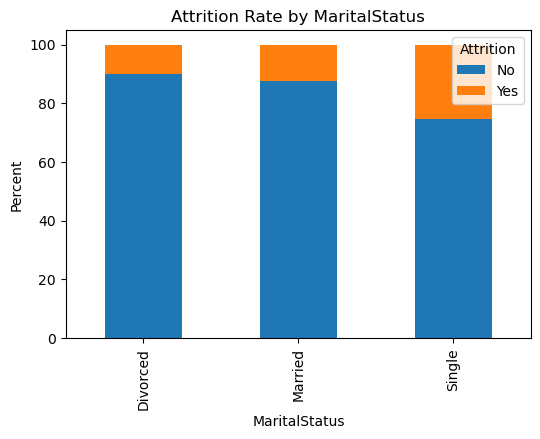

In [139]:
cat_cols = ["BusinessTravel", "Department", "JobRole", "MaritalStatus"]
for col in cat_cols:
    ct = pd.crosstab(df[col], df["Attrition"], normalize="index") * 100
    ct.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.ylabel("Percent")
    plt.title(f"Attrition Rate by {col}")
    plt.legend(title="Attrition")
    plt.show()

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



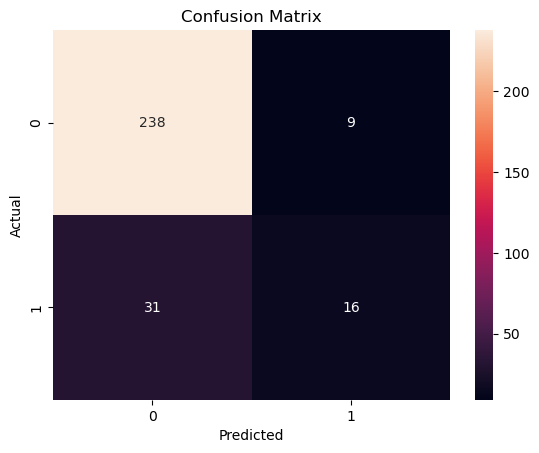

ROC AUC: 0.809


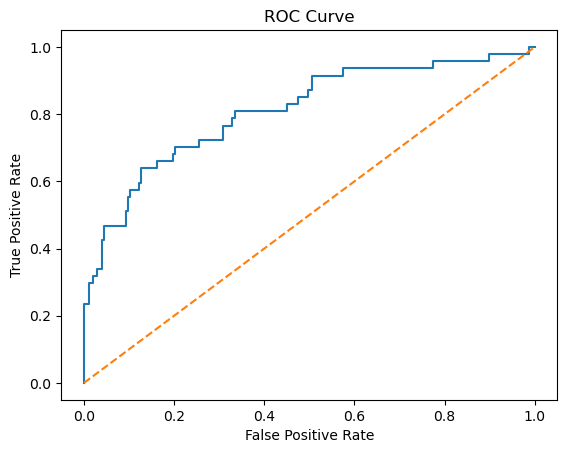

In [140]:
# --- 2) Map target and drop original ---
df["Attrition_flag"] = df["Attrition"].map({"Yes": 1, "No": 0})
df.drop("Attrition", axis=1, inplace=True)

# --- 3) Identify feature types ---
num_cols = df.select_dtypes(include=["int64","float64"]).columns.drop("Attrition_flag")
cat_cols = df.select_dtypes(include=["object"]).columns

# --- 4) One-hot encode categoricals ---
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# --- 5) Scale numeric features ---
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# --- 6) Train/test split ---
X = df.drop("Attrition_flag", axis=1)
y = df["Attrition_flag"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 7) Fit baseline Logistic Regression ---
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

# --- 8) Evaluate ---
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


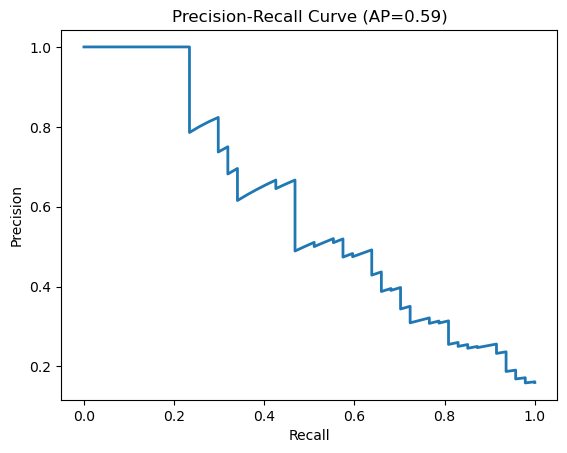

In [141]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision‑Recall Curve (AP={ap:.2f})")
plt.show()

In [142]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

gs = GridSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("CV AUC:", gs.best_score_)

Best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
CV AUC: 0.8334841873180105


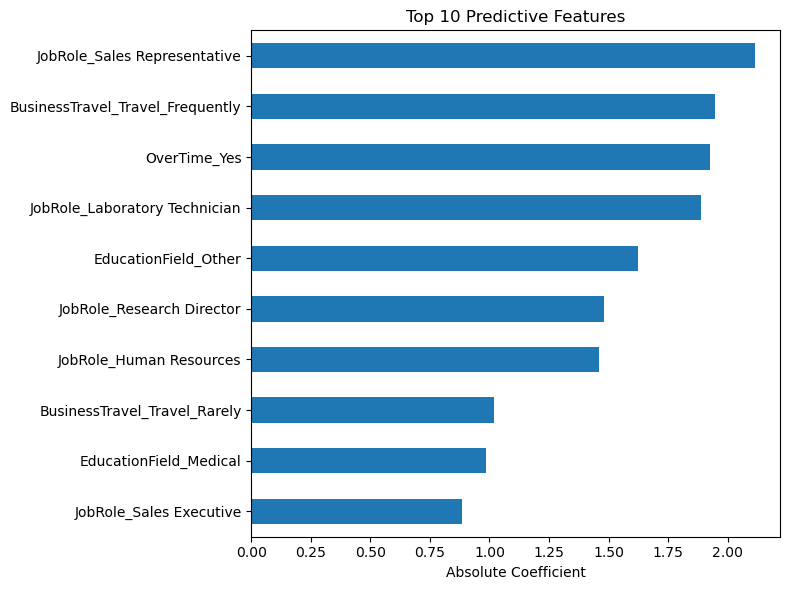

In [158]:
# Numeric vs. categorical
num_cols = df.select_dtypes(include=["int64","float64"]).columns.drop("Attrition_flag")
cat_cols = df.select_dtypes(include=["object"]).columns

# One-hot encode cats
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale nums
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 4) Split
X = df.drop("Attrition_flag", axis=1)
y = df["Attrition_flag"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5) Train best model
best_lr = LogisticRegression(C=10, penalty='l2', solver='lbfgs',
                             max_iter=1000, random_state=42)
best_lr.fit(X_train, y_train)

# 6) Extract & plot top 10 features
coef = pd.Series(best_lr.coef_[0], index=X_train.columns)
top10 = coef.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
top10.plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel("Absolute Coefficient")
plt.title("Top 10 Predictive Features")
plt.tight_layout()
plt.show()

Average Precision (AP): 0.589
Best threshold for max F1: 0.256 → F1 = 0.556


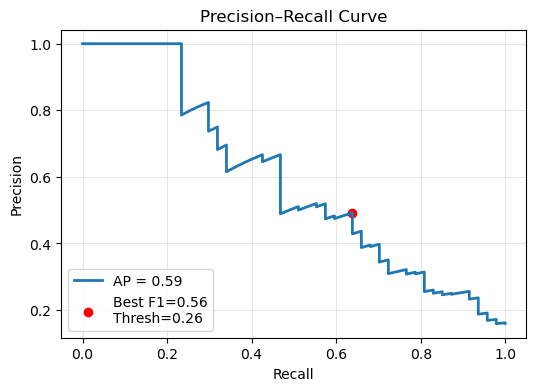

In [172]:
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score,
    f1_score
)

# 1) Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
print(f"Average Precision (AP): {ap:.3f}")

# 2) Find threshold that gives max F1
f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.nanargmax(f1_scores)        # index of max F1
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
print(f"Best threshold for max F1: {best_thresh:.3f} → F1 = {best_f1:.3f}")

# 3) Plot Precision–Recall curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, lw=2, label=f'AP = {ap:.2f}')
plt.scatter(recall[best_idx], precision[best_idx],
            marker='o', color='red',
            label=f'Best F1={best_f1:.2f}\nThresh={best_thresh:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()


              precision    recall  f1-score   support

        Stay       0.92      0.87      0.90       247
     Attrite       0.48      0.62      0.54        47

    accuracy                           0.83       294
   macro avg       0.70      0.75      0.72       294
weighted avg       0.85      0.83      0.84       294



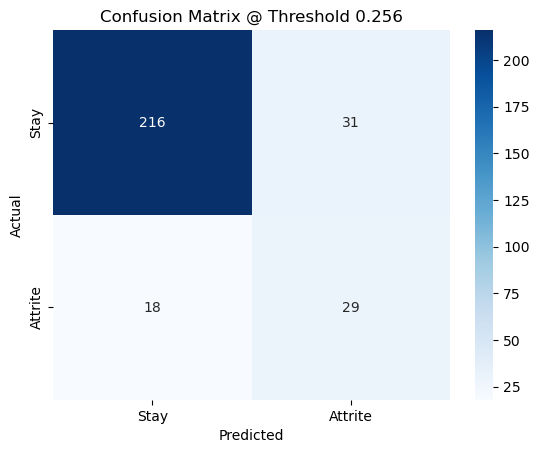

In [174]:
from sklearn.metrics import classification_report, confusion_matrix

# 1) Use the new threshold
y_pred_thresh = (y_prob >= 0.256).astype(int)

# 2) Classification report
print(classification_report(y_test, y_pred_thresh, target_names=["Stay","Attrite"]))

# 3) Confusion matrix
cm = confusion_matrix(y_test, y_pred_thresh)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Stay","Attrite"], 
            yticklabels=["Stay","Attrite"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix @ Threshold 0.256")
plt.show()

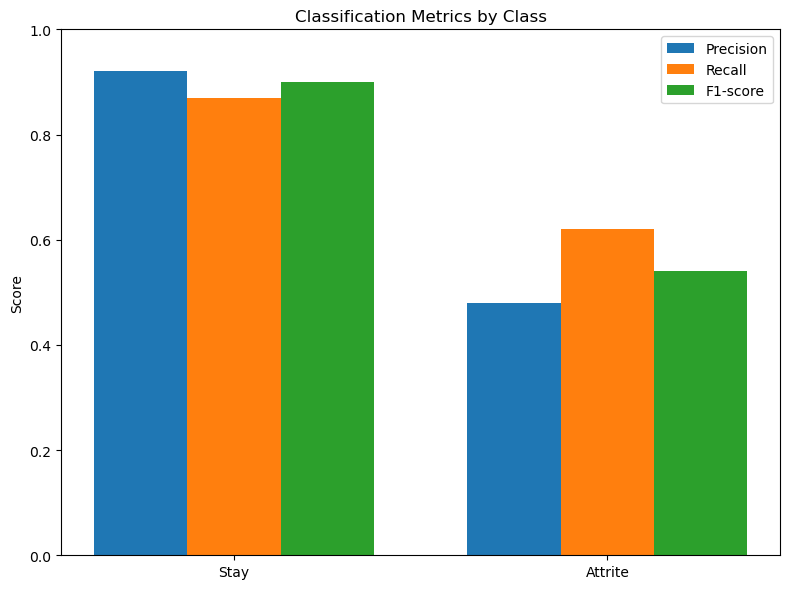

In [176]:
# Metrics from your classification report
classes   = ['Stay', 'Attrite']
precision = [0.92, 0.48]
recall    = [0.87, 0.62]
f1_score  = [0.90, 0.54]

# Positions and bar width
x     = np.arange(len(classes))
width = 0.25

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x,         recall,    width, label='Recall')
ax.bar(x + width, f1_score,  width, label='F1-score')

# Labels and aesthetics
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Classification Metrics by Class')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()